In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

import sys
import os
sys.path.append('/'.join(os.getcwd().split('/')[:-2]))
#print(sys.path)
import util.items as items

from sklearn.preprocessing import StandardScaler

In [3]:
import keras
from keras.layers import InputLayer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [4]:
item = "Lobster"

In [8]:
prices = items.getPrices(item)
ma3 = items.movingAverage(item,3)
ma12 = items.movingAverage(item,12)
print(len(ma3),len(ma12))

1309 1300


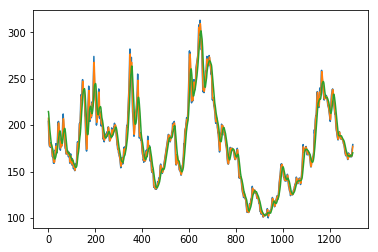

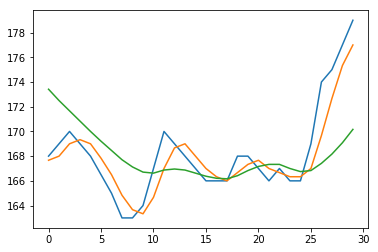

In [10]:
plt.plot(prices[-1*len(ma12):])
plt.plot(ma3[-1*len(ma12):])
plt.plot(ma12[-1*len(ma12):])
plt.show()
plt.plot(prices[-1*30:])
plt.plot(ma3[-1*30:])
plt.plot(ma12[-1*30:])
plt.show()

In [22]:
sell = []
buy = []
for i in range(-1*len(ma12)+1,-1,1):
    if ma3[i-1]>ma12[i-1] and ma3[i]<ma12[i]:
        sell.append(len(ma12)+i)
    if ma3[i-1]<ma12[i-1] and ma3[i]>ma12[i]:
        buy.append(len(ma12)+i)

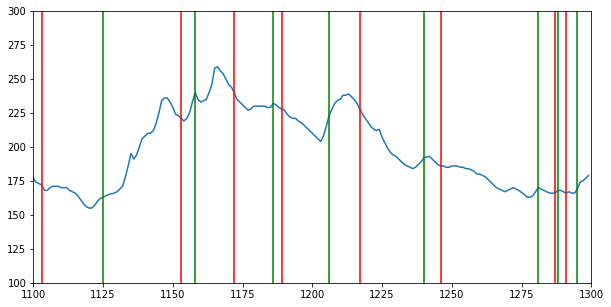

In [23]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(prices[-1*len(ma12):])
for c in sell:
    plt.plot([c,c],[0,500],'r')
for c in buy:
    plt.plot([c,c],[0,500],'g')
plt.xlim(1100,1300)
plt.ylim(100,300)
plt.show()

In [49]:
def dualSMACrossover(buyPred,sellPred,data,start,stop,buyLimit,budget):
    init = budget
    buyLimit = int(buyLimit)
    invent = 0
    profits = []
    for i in range(start,stop,1):
        if i in buyPred:
            buy = budget//data[i]
            if buy>buyLimit:
                buy = buyLimit
            invent += buy
            budget -= buy * data[i]
        if i in sellPred:
            budget += invent * data[i]
            invent = 0
        profits.append(((budget + invent * data[i]) - init) / init)
    return profits

In [54]:
bl = int(items.getInfo(item)['buyLimit'])
pTot = dualSMACrossover(set(buy),set(sell),prices[-1*len(ma12):],0,len(ma12),bl,1000000)
p90 = dualSMACrossover(set(buy),set(sell),prices[-1*len(ma12):],len(ma12)-90,len(ma12),bl,1000000)

2.9926071739130435


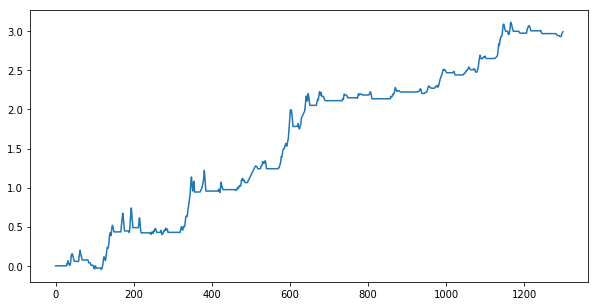

-0.01


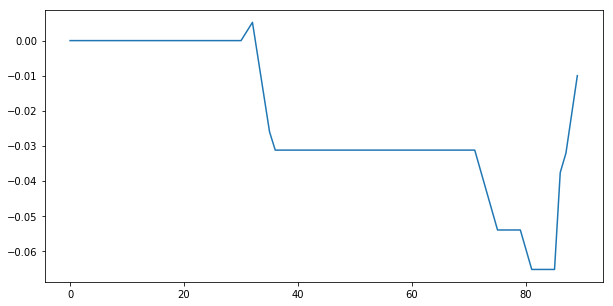

In [55]:
print(pTot[-1])
plt.plot(pTot)
plt.show()
print(p90[-1])
plt.plot(p90)
plt.show()

In [61]:
kFast = []
for i in range(5,len(prices)):
    bot = max(prices[i-5:i])-min(prices[i-5:i])
    if bot == 0:
        bot = 1
    kFast.append(prices[i]/(bot))
    
kSlow = []
for i in range(5,len(kFast)):
    kSlow.append(np.mean(kFast[i-5:i]))
    
D = []
for i in range(3,len(kSlow)):
    D.append(np.mean(kSlow[i-3:i]))

1306 1301 1298


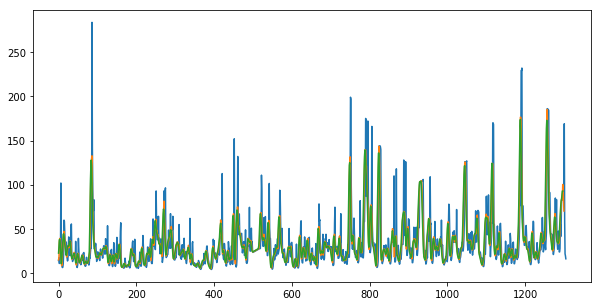

In [63]:
print(len(kFast),len(kSlow),len(D))
plt.plot(kFast)
plt.plot(kSlow)
plt.plot(D)
plt.show()